In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# --------------------------------------------------------
# 1️⃣ Load the dataset
# --------------------------------------------------------
df = pd.read_excel("iris-dataset.xlsx", header=0)

print (type(df))
print (df.shape)

df.head()

<class 'pandas.core.frame.DataFrame'>
(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
# 2️⃣ Use only Species 0 and 1 (Iris-setosa, Iris-versicolor)
df = df[df['Species'].isin(['Iris-setosa', 'Iris-virginica'])]

df.shape

(100, 5)

In [37]:
# 3️⃣ Assign labels: setosa → 1 (normal), versicolor → -1 (anomaly)
df['Label'] = df['Species'].apply(lambda x: 1 if x == 'Iris-setosa' else -1)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,-1
146,6.3,2.5,5.0,1.9,Iris-virginica,-1
147,6.5,3.0,5.2,2.0,Iris-virginica,-1
148,6.2,3.4,5.4,2.3,Iris-virginica,-1


In [38]:
# 4️⃣ Separate features and labels
x_data = df.drop(['Species', 'Label'], axis=1).values
y_true = df['Label'].values

# 5️⃣ MinMax Scaling
scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)

In [39]:
# --------------------------------------------------------
# 6️⃣ Define models
# --------------------------------------------------------
models = {
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, novelty=True),
    "Isolation Forest": IsolationForest(contamination=0.05), 
    "One-Class SVM": OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05) 
}


In [40]:
# --------------------------------------------------------
# 7️⃣ Train using only normal data
# --------------------------------------------------------
x_train = x_data_scaled[y_true == 1]
x_test = x_data_scaled
y_test = y_true


🔹 Local Outlier Factor
[[48  2]
 [ 0 50]]
              precision    recall  f1-score   support

  Normal (1)       0.96      1.00      0.98        50
Outlier (-1)       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



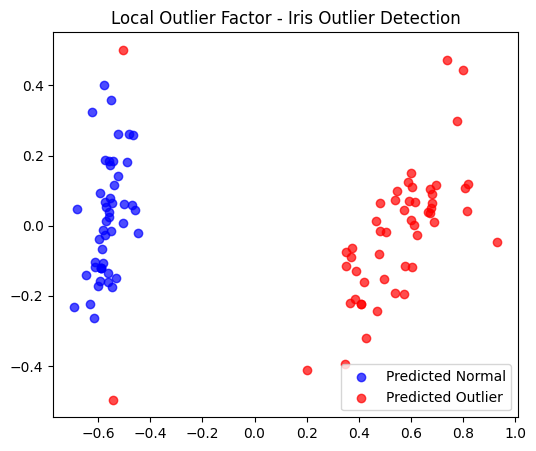


🔹 Isolation Forest
[[47  3]
 [ 0 50]]
              precision    recall  f1-score   support

  Normal (1)       0.94      1.00      0.97        50
Outlier (-1)       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



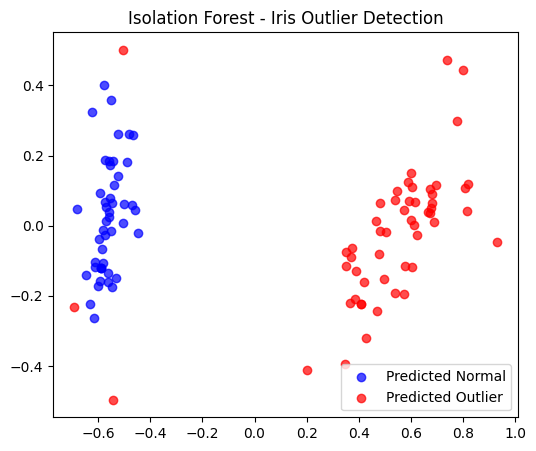


🔹 One-Class SVM
[[47  3]
 [ 0 50]]
              precision    recall  f1-score   support

  Normal (1)       0.94      1.00      0.97        50
Outlier (-1)       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



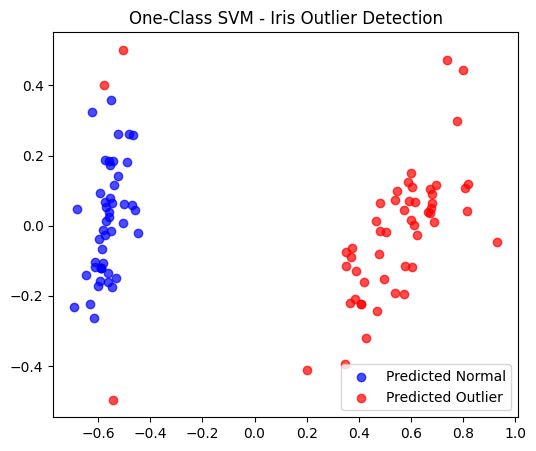

In [41]:
# --------------------------------------------------------
# 8️⃣ Compare results for each model
# --------------------------------------------------------
for name, model in models.items():
    model.fit(x_train)
    y_pred = model.predict(x_test)
    
    print(f"\n🔹 {name}")
    print(confusion_matrix(y_test, y_pred, labels=[1, -1]))
    print(classification_report(y_test, y_pred, target_names=['Normal (1)', 'Outlier (-1)']))
    
    # --------------------------------------------------------
    # PCA 시각화
    # --------------------------------------------------------
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_test)
    
    plt.figure(figsize=(6, 5))
    plt.scatter(x_pca[y_pred == 1, 0], x_pca[y_pred == 1, 1],
                label='Predicted Normal', alpha=0.7, color='blue')
    plt.scatter(x_pca[y_pred == -1, 0], x_pca[y_pred == -1, 1],
                label='Predicted Outlier', alpha=0.7, color='red')
    plt.title(f"{name} - Iris Outlier Detection")
    plt.legend()
    plt.show()